<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/multiple_farms_work_good_for_two_adv2_got_work_with_5_farms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equation of the trend line for Data 1: y = -0.000191x + 0.333127
Equation of the trend line for Data 2: y = -0.000790x + 0.520311
Percentage change over the given time period for Data 1: -14.55%
Percentage change over the given time period for Data 2: -25.26%


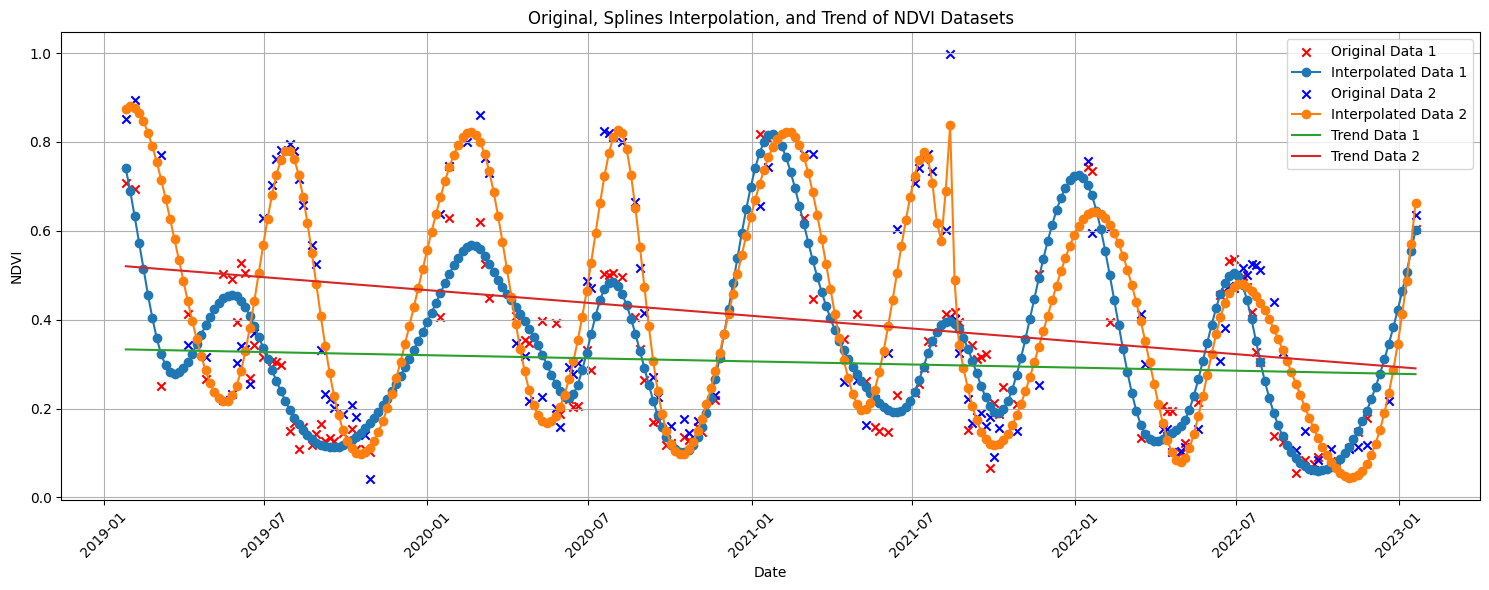

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load the first CSV file
df1 = pd.read_csv('/content/S2-2019-JAN2023.csv')

# Load the second CSV file
df2 = pd.read_csv('/content/ndvi-1-adapt.csv')  # Replace with the path to your second CSV file

# Convert the "Date" column to datetime for both DataFrames
df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])

# Set the "Date" column as the index for both DataFrames
df1 = df1.set_index("Date")
df2 = df2.set_index("Date")

# Resample the data to handle duplicate date labels (e.g., calculating the mean for duplicate dates)
df1 = df1.resample("5D").mean()
df2 = df2.resample("5D").mean()

# Replace missing values with NaN for both DataFrames
df1["NDVI"] = df1["NDVI"].replace(0, np.nan)
df2["NDVI"] = df2["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df1))
mask1 = ~np.isnan(df1["NDVI"])
mask2 = ~np.isnan(df2["NDVI"])
s_values = [0.35]

interpolated_values1 = []
interpolated_values2 = []

spline1 = UnivariateSpline(x[mask1], df1["NDVI"][mask1], k=3, s=s)
interpolated_values1.append(spline1(x))

spline2 = UnivariateSpline(x[mask2], df2["NDVI"][mask2], k=3, s=s)
interpolated_values2.append(spline2(x))

# Reset the index and rename the columns for both DataFrames
df1 = df1.reset_index()
df1 = df1.rename(columns={"index": "Date"})

df2 = df2.reset_index()
df2 = df2.rename(columns={"index": "Date"})

# Remove rows with missing values for both DataFrames
df1_trend = df1.dropna()
df2_trend = df2.dropna()

# Calculate the trend using linear regression for both DataFrames
X1 = df1_trend.index.values.reshape(-1, 1)
y1 = df1_trend["NDVI"]
model1 = LinearRegression()
model1.fit(X1, y1)
trend1 = model1.predict(X1)

X2 = df2_trend.index.values.reshape(-1, 1)
y2 = df2_trend["NDVI"]
model2 = LinearRegression()
model2.fit(X2, y2)
trend2 = model2.predict(X2)

# Print the equations of the trend lines for both DataFrames
slope1 = model1.coef_[0]
intercept1 = model1.intercept_
print("Equation of the trend line for Data 1: y = {:.6f}x + {:.6f}".format(slope1, intercept1))

slope2 = model2.coef_[0]
intercept2 = model2.intercept_
print("Equation of the trend line for Data 2: y = {:.6f}x + {:.6f}".format(slope2, intercept2))

# Calculate the percentage change of the NDVI values over the given time period for both DataFrames
initial_ndvi1 = df1_trend["NDVI"].iloc[0]
final_ndvi1 = df1_trend["NDVI"].iloc[-1]
percentage_change1 = ((final_ndvi1 - initial_ndvi1) / initial_ndvi1) * 100
print("Percentage change over the given time period for Data 1: {:.2f}%".format(percentage_change1))

initial_ndvi2 = df2_trend["NDVI"].iloc[0]
final_ndvi2 = df2_trend["NDVI"].iloc[-1]
percentage_change2 = ((final_ndvi2 - initial_ndvi2) / initial_ndvi2) * 100
print("Percentage change over the given time period for Data 2: {:.2f}%".format(percentage_change2))

# Create a DataFrame with the interpolated values and corresponding dates for both DataFrames
interpolated_df1 = pd.DataFrame({"Date": df1["Date"], "NDVI": interpolated_values1[0]})
interpolated_df2 = pd.DataFrame({"Date": df2["Date"], "NDVI": interpolated_values2[0]})

# Save the DataFrames to CSV files
interpolated_df1.to_csv("/content/interpolated_data1.csv", index=False)
interpolated_df2.to_csv("/content/interpolated_data2.csv", index=False)

# Plot the original data, interpolated values, and trend for both DataFrames
plt.figure(figsize=(15, 6))
plt.scatter(df1["Date"], df1["NDVI"], marker="x", label="Original Data 1", color="red")
plt.plot(df1["Date"], interpolated_values1[0][:len(df1)], "o-", label="Interpolated Data 1")

plt.scatter(df2["Date"], df2["NDVI"], marker="x", label="Original Data 2", color="blue")
plt.plot(df2["Date"], interpolated_values2[0][:len(df2)], "o-", label="Interpolated Data 2")

plt.plot(df1_trend["Date"], trend1, label="Trend Data 1")
plt.plot(df2_trend["Date"], trend2, label="Trend Data 2")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Datasets")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#modifying the freq to 1day

Equation of the trend line for Data 1: y = -0.000038x + 0.333127
Equation of the trend line for Data 2: y = -0.000158x + 0.520311
Percentage change over the given time period for Data 1: -14.55%
Percentage change over the given time period for Data 2: -25.26%


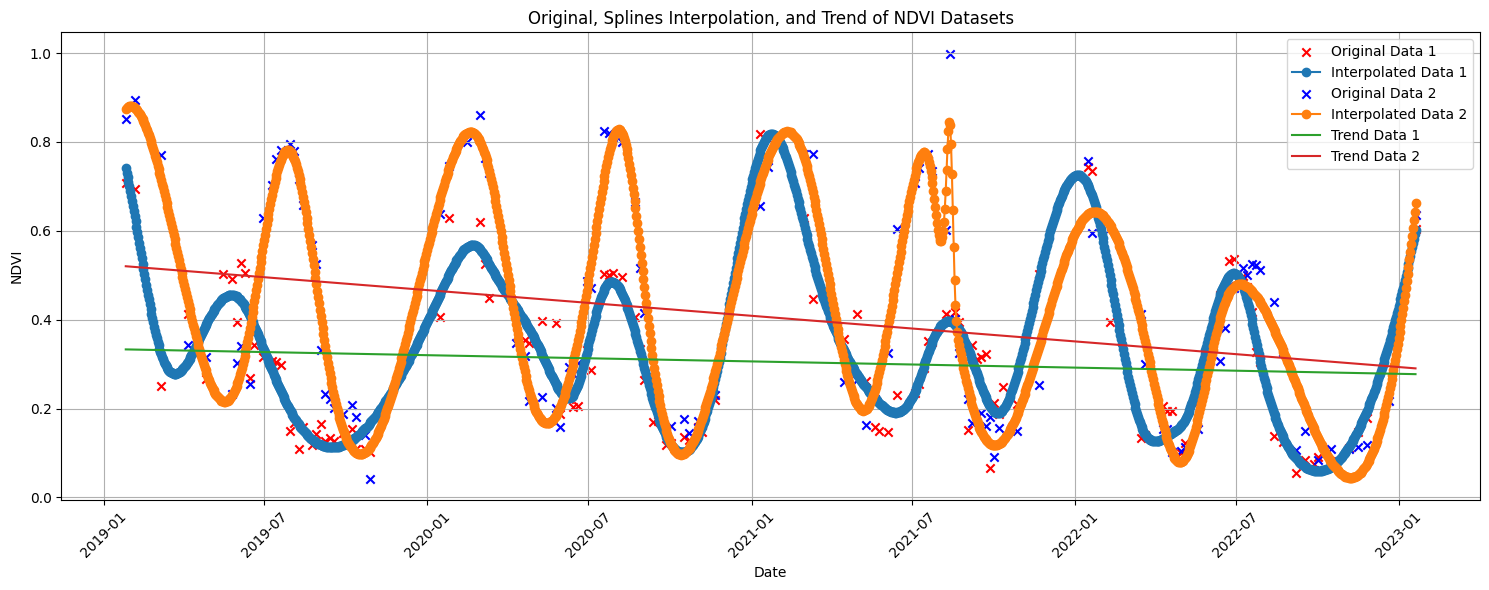

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load the first CSV file
df1 = pd.read_csv('/content/S2-2019-JAN2023.csv')

# Load the second CSV file
df2 = pd.read_csv('/content/ndvi-1-adapt.csv')  # Replace with the path to your second CSV file

# Convert the "Date" column to datetime for both DataFrames
df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])

# Set the "Date" column as the index for both DataFrames
df1 = df1.set_index("Date")
df2 = df2.set_index("Date")

# Resample the data to handle duplicate date labels (e.g., calculating the mean for duplicate dates)
df1 = df1.resample("1D").mean()
df2 = df2.resample("1D").mean()

# Replace missing values with NaN for both DataFrames
df1["NDVI"] = df1["NDVI"].replace(0, np.nan)
df2["NDVI"] = df2["NDVI"].replace(0, np.nan)

# Interpolate missing values using UnivariateSpline for different values of s
x = np.arange(len(df1))
mask1 = ~np.isnan(df1["NDVI"])
mask2 = ~np.isnan(df2["NDVI"])
s_values = [0.35]

interpolated_values1 = []
interpolated_values2 = []

spline1 = UnivariateSpline(x[mask1], df1["NDVI"][mask1], k=3, s=s)
interpolated_values1.append(spline1(x))

spline2 = UnivariateSpline(x[mask2], df2["NDVI"][mask2], k=3, s=s)
interpolated_values2.append(spline2(x))

# Reset the index and rename the columns for both DataFrames
df1 = df1.reset_index()
df1 = df1.rename(columns={"index": "Date"})

df2 = df2.reset_index()
df2 = df2.rename(columns={"index": "Date"})

# Remove rows with missing values for both DataFrames
df1_trend = df1.dropna()
df2_trend = df2.dropna()

# Calculate the trend using linear regression for both DataFrames
X1 = df1_trend.index.values.reshape(-1, 1)
y1 = df1_trend["NDVI"]
model1 = LinearRegression()
model1.fit(X1, y1)
trend1 = model1.predict(X1)

X2 = df2_trend.index.values.reshape(-1, 1)
y2 = df2_trend["NDVI"]
model2 = LinearRegression()
model2.fit(X2, y2)
trend2 = model2.predict(X2)

# Print the equations of the trend lines for both DataFrames
slope1 = model1.coef_[0]
intercept1 = model1.intercept_
print("Equation of the trend line for Data 1: y = {:.6f}x + {:.6f}".format(slope1, intercept1))

slope2 = model2.coef_[0]
intercept2 = model2.intercept_
print("Equation of the trend line for Data 2: y = {:.6f}x + {:.6f}".format(slope2, intercept2))

# Calculate the percentage change of the NDVI values over the given time period for both DataFrames
initial_ndvi1 = df1_trend["NDVI"].iloc[0]
final_ndvi1 = df1_trend["NDVI"].iloc[-1]
percentage_change1 = ((final_ndvi1 - initial_ndvi1) / initial_ndvi1) * 100
print("Percentage change over the given time period for Data 1: {:.2f}%".format(percentage_change1))

initial_ndvi2 = df2_trend["NDVI"].iloc[0]
final_ndvi2 = df2_trend["NDVI"].iloc[-1]
percentage_change2 = ((final_ndvi2 - initial_ndvi2) / initial_ndvi2) * 100
print("Percentage change over the given time period for Data 2: {:.2f}%".format(percentage_change2))

# Create a DataFrame with the interpolated values and corresponding dates for both DataFrames
interpolated_df1 = pd.DataFrame({"Date": df1["Date"], "NDVI": interpolated_values1[0]})
interpolated_df2 = pd.DataFrame({"Date": df2["Date"], "NDVI": interpolated_values2[0]})

# Save the DataFrames to CSV files
interpolated_df1.to_csv("/content/interpolated_data1.csv", index=False)
interpolated_df2.to_csv("/content/interpolated_data2.csv", index=False)

# Plot the original data, interpolated values, and trend for both DataFrames
plt.figure(figsize=(15, 6))
plt.scatter(df1["Date"], df1["NDVI"], marker="x", label="Original Data 1", color="red")
plt.plot(df1["Date"], interpolated_values1[0][:len(df1)], "o-", label="Interpolated Data 1")

plt.scatter(df2["Date"], df2["NDVI"], marker="x", label="Original Data 2", color="blue")
plt.plot(df2["Date"], interpolated_values2[0][:len(df2)], "o-", label="Interpolated Data 2")

plt.plot(df1_trend["Date"], trend1, label="Trend Data 1")
plt.plot(df2_trend["Date"], trend2, label="Trend Data 2")
plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Datasets")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#for 5 works good without tendence

<ipython-input-7-f5d7b5c38f82>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  farm_dataframes[i] = farm_dataframes[i].resample("5D").mean()
<ipython-input-7-f5d7b5c38f82>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  farm_dataframes[i] = farm_dataframes[i].resample("5D").mean()
<ipython-input-7-f5d7b5c38f82>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  farm_dataframes[i] = farm_dataframes[i].resample("5D")

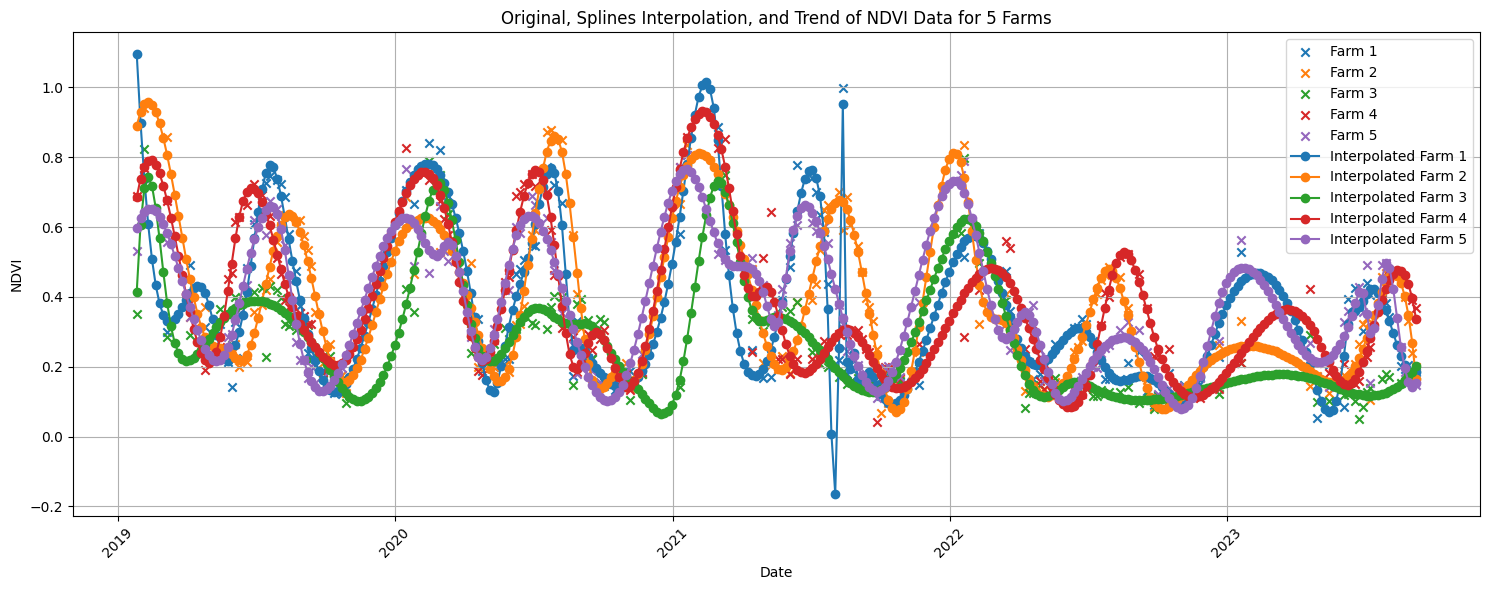

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load data for 5 farms
df_farm1 = pd.read_csv('/content/r1-c-p2.csv')
df_farm2 = pd.read_csv('/content/r1-c-p3.csv')
df_farm3 = pd.read_csv('/content/r1-d-p1.csv')
df_farm4 = pd.read_csv('/content/r1-d-p2.csv')
df_farm5 = pd.read_csv('/content/r1-d-p3.csv')

# Define a list of DataFrames for the farms
farm_dataframes = [df_farm1, df_farm2, df_farm3, df_farm4, df_farm5]

# Convert the "Date" column to datetime for all farms
for i in range(5):
    farm_dataframes[i]["Date"] = pd.to_datetime(farm_dataframes[i]["system:time_start"])

# Generate a unique date range based on the intersection of date ranges for all farms
start_date = max(df["Date"].min() for df in farm_dataframes)
end_date = min(df["Date"].max() for df in farm_dataframes)
date_range = pd.date_range(start=start_date, end=end_date, freq="5D")

# Create lists to store interpolated values and trend data for all farms
interpolated_values = []
trend_data = []

for i in range(5):
    # Set the "Date" column as the index for each farm DataFrame
    farm_dataframes[i] = farm_dataframes[i].set_index("Date")

    # Resample the data to handle duplicate date labels (e.g., calculate the mean for duplicate dates)
    farm_dataframes[i] = farm_dataframes[i].resample("5D").mean()

    # Replace missing values with NaN for each farm
    farm_dataframes[i]["NDVI"] = farm_dataframes[i]["ndvi"].replace(0, np.nan)

    # Interpolate missing values using UnivariateSpline for different values of s
    x = np.arange(len(farm_dataframes[i]))
    mask = ~np.isnan(farm_dataframes[i]["NDVI"])
    s_values = [0.35]

    interpolated_values_farm = []

    for s in s_values:
        spline = UnivariateSpline(x[mask], farm_dataframes[i]["NDVI"][mask], k=3, s=s)
        interpolated_values_farm.append(spline(x))

    interpolated_values.append(interpolated_values_farm)

    # Reset the index and rename the columns for each farm
    farm_dataframes[i] = farm_dataframes[i].reset_index()
    farm_dataframes[i] = farm_dataframes[i].rename(columns={"index": "Date"})

    # Remove rows with missing values for each farm
    trend_data_farm = farm_dataframes[i].dropna()

    # Calculate the trend using linear regression for each farm
    X = trend_data_farm.index.values.reshape(-1, 1)
    y = trend_data_farm["NDVI"]
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    trend_data.append(trend)

# Create a DataFrame with interpolated values and corresponding dates for all farms
interpolated_dfs = []
for i in range(5):
    interpolated_df = pd.DataFrame({"Date": farm_dataframes[i]["Date"], "NDVI": interpolated_values[i][0]})
    interpolated_dfs.append(interpolated_df)

# Save the interpolated DataFrames to CSV files for each farm
for i in range(5):
    interpolated_dfs[i].to_csv(f"/content/interpolated_data_farm{i+1}.csv", index=False)

# Plot the original data, interpolated values, and trend for all 5 farms
plt.figure(figsize=(15, 6))

# Plot original data for all farms
for i in range(5):
    plt.scatter(farm_dataframes[i]["Date"], farm_dataframes[i]["NDVI"], marker="x", label=f"Farm {i + 1}")

# Plot interpolated values for all farms
for i in range(5):
    plt.plot(farm_dataframes[i]["Date"], interpolated_values[i][0][:len(farm_dataframes[i])], "o-", label=f"Interpolated Farm {i + 1}")

# # Plot trend data for all farms
# for i in range(5):
#     plt.plot(farm_dataframes[i]["Date"], trend_data[i], label=f"Trend Farm {i + 1}")

plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Data for 5 Farms")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#the same but removing outliers

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load data for 5 farms
df_farm1 = pd.read_csv('/content/r1-c-p2.csv')
df_farm2 = pd.read_csv('/content/r1-c-p3.csv')
df_farm3 = pd.read_csv('/content/r1-d-p1.csv')
df_farm4 = pd.read_csv('/content/r1-d-p2.csv')
df_farm5 = pd.read_csv('/content/r1-d-p3.csv')


###########

# Assuming you have a DataFrame named df with your data
# Replace df with the actual name of your DataFrame

# Rename the columns
df_farm1 = df_farm1.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm2 = df_farm2.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm3 = df_farm3.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm4 = df_farm4.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm5 = df_farm5.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Now, the 'system:time_start' column is renamed to 'Date', and 'ndvi' is renamed to 'NDVI'

#############
# Define a list of DataFrames for the farms
farm_dataframes = [df_farm1, df_farm2, df_farm3, df_farm4, df_farm5]

# A function to remove outliers using the IQR method
def remove_outliers(df):
    Q1 = df['NDVI'].quantile(0.25)
    Q3 = df['NDVI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df['NDVI'] >= lower_bound) & (df['NDVI'] <= upper_bound)]
    return df_no_outliers

# Process each farm's data
interpolated_values = []
trend_data = []

for i in range(5):
    # Set the "Date" column as the index for each farm DataFrame
    farm_dataframes[i]["Date"] = pd.to_datetime(farm_dataframes[i]["Date"])
    farm_dataframes[i] = farm_dataframes[i].set_index("Date")

    # Resample the data to handle duplicate date labels
    farm_dataframes[i] = farm_dataframes[i].resample("5D").mean()

    # Replace missing values with NaN for each farm
    farm_dataframes[i]["NDVI"] = farm_dataframes[i]["NDVI"].replace(0, np.nan)

    # Interpolate missing values using UnivariateSpline
    x = np.arange(len(farm_dataframes[i]))
    mask = ~np.isnan(farm_dataframes[i]["NDVI"])
    s_values = [0.35]

    interpolated_values_farm = []

    for s in s_values:
        spline = UnivariateSpline(x[mask], farm_dataframes[i]["NDVI"][mask], k=3, s=s)
        interpolated_values_farm.append(spline(x))

    interpolated_values.append(interpolated_values_farm)

    # Reset the index and rename the columns for each farm
    farm_dataframes[i] = farm_dataframes[i].reset_index()
    farm_dataframes[i] = farm_dataframes[i].rename(columns={"index": "Date"})

    # Remove rows with missing values and outliers for each farm
    farm_dataframes[i] = remove_outliers(farm_dataframes[i])

    # Calculate the trend using linear regression for each farm
    X = farm_dataframes[i].index.values.reshape(-1, 1)
    y = farm_dataframes[i]["NDVI"]
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    trend_data.append(trend)

# Create a DataFrame with interpolated values and corresponding dates for all farms
interpolated_dfs = []
for i in range(5):
    interpolated_df = pd.DataFrame({"Date": farm_dataframes[i]["Date"], "NDVI": interpolated_values[i][0]})
    interpolated_dfs.append(interpolated_df)

# Save the interpolated DataFrames to CSV files for each farm
for i in range(5):
    interpolated_dfs[i].to_csv(f"/content/interpolated_data_farm{i+1}.csv", index=False)

# Plot the original data, interpolated values, and trend for all 5 farms
plt.figure(figsize=(15, 6))

# Plot original data for all farms
for i in range(5):
    plt.scatter(farm_dataframes[i]["Date"], farm_dataframes[i]["NDVI"], marker="x", label=f"Farm {i + 1}")

# Plot interpolated values for all farms
for i in range(5):
    plt.plot(farm_dataframes[i]["Date"], interpolated_values[i][0][:len(farm_dataframes[i])], "o-", label=f"Interpolated Farm {i + 1}")

# Plot trend data for all farms
for i in range(5):
    plt.plot(farm_dataframes[i]["Date"], trend_data[i], label=f"Trend Farm {i + 1}")

plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Data for 5 Farms (Outliers Removed)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: ignored

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression

# Load data for 5 farms
df_farm1 = pd.read_csv('/content/r1-c-p2.csv')
df_farm2 = pd.read_csv('/content/r1-c-p3.csv')
df_farm3 = pd.read_csv('/content/r1-d-p1.csv')
df_farm4 = pd.read_csv('/content/r1-d-p2.csv')
df_farm5 = pd.read_csv('/content/r1-d-p3.csv')

# Rename the columns
df_farm1 = df_farm1.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm2 = df_farm2.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm3 = df_farm3.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm4 = df_farm4.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})
df_farm5 = df_farm5.rename(columns={'system:time_start': 'Date', 'ndvi': 'NDVI'})

# Define a list of DataFrames for the farms
farm_dataframes = [df_farm1, df_farm2, df_farm3, df_farm4, df_farm5]

# A function to remove outliers using the IQR method
def remove_outliers(df):
    Q1 = df['NDVI'].quantile(0.25)
    Q3 = df['NDVI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df['NDVI'] >= lower_bound) & (df['NDVI'] <= upper_bound)]
    return df_no_outliers

# Process each farm's data
interpolated_values = []
trend_data = []

for i in range(5):
    # Set the "Date" column as the index for each farm DataFrame
    farm_dataframes[i]["Date"] = pd.to_datetime(farm_dataframes[i]["Date"])
    farm_dataframes[i] = farm_dataframes[i].set_index("Date")

    # Resample the data to handle duplicate date labels
    farm_dataframes[i] = farm_dataframes[i].resample("5D").mean()

    # Replace missing values with NaN for each farm
    farm_dataframes[i]["NDVI"] = farm_dataframes[i]["NDVI"].replace(0, np.nan)

    # Interpolate missing values using UnivariateSpline
    x = np.arange(len(farm_dataframes[i]))
    mask = ~np.isnan(farm_dataframes[i]["NDVI"])
    s = 0.35  # Choose a consistent value for s

    spline = UnivariateSpline(x[mask], farm_dataframes[i]["NDVI"][mask], k=3, s=s)
    interpolated_values_farm = spline(x)

    interpolated_values.append(interpolated_values_farm)

    # Reset the index and rename the columns for each farm
    farm_dataframes[i] = farm_dataframes[i].reset_index()
    farm_dataframes[i] = farm_dataframes[i].rename(columns={"index": "Date"})

    # Remove rows with missing values and outliers for each farm
    farm_dataframes[i] = remove_outliers(farm_dataframes[i])

    # Calculate the trend using linear regression for each farm
    X = farm_dataframes[i].index.values.reshape(-1, 1)
    y = farm_dataframes[i]["NDVI"]
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    trend_data.append(trend)

# Create a DataFrame with interpolated values and corresponding dates for all farms
interpolated_dfs = []
for i in range(5):
    interpolated_df = pd.DataFrame({"Date": farm_dataframes[i]["Date"], "NDVI": interpolated_values[i]})
    interpolated_dfs.append(interpolated_df)

# Save the interpolated DataFrames to CSV files for each farm
for i in range(5):
    interpolated_dfs[i].to_csv(f"/content/interpolated_data_farm{i+1}.csv", index=False)

# Plot the original data, interpolated values, and trend for all 5 farms
plt.figure(figsize=(15, 6))

# Plot original data for all farms
for i in range(5):
    plt.scatter(farm_dataframes[i]["Date"], farm_dataframes[i]["NDVI"], marker="x", label=f"Farm {i + 1}")

# Plot interpolated values for all farms
for i in range(5):
    plt.plot(farm_dataframes[i]["Date"], interpolated_values[i], "o-", label=f"Interpolated Farm {i + 1}")

# Plot trend data for all farms
for i in range(5):
    plt.plot(farm_dataframes[i]["Date"], trend_data[i], label=f"Trend Farm {i + 1}")

plt.xlabel("Date")
plt.ylabel("NDVI")
plt.title("Original, Splines Interpolation, and Trend of NDVI Data for 5 Farms (Outliers Removed)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: ignored